In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('/content/tested.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Missing Data**

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: >

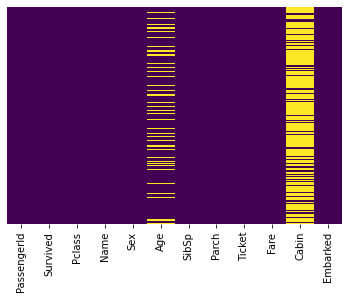

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

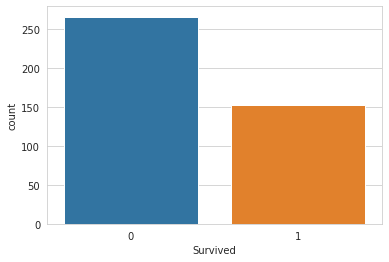

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

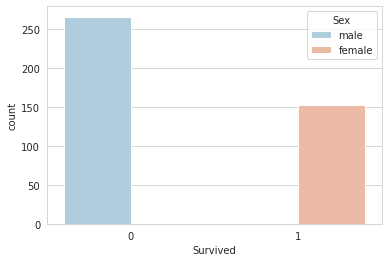

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

## **How many passengers survived?**

In [10]:
# How many passengers survived
survived_count = train['Survived'].sum()
print(f"Number of passengers who survived: {survived_count}")

Number of passengers who survived: 152


<Axes: xlabel='Survived', ylabel='count'>

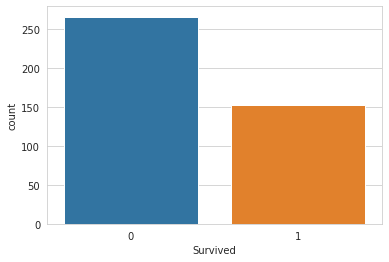

In [11]:
sns.countplot(x='Survived', data=train)

## **How many Genders wise passenger survived?**

In [13]:
# How many Genders wise passenger survived
gender_survived = train.groupby(['Sex'])['Survived'].sum()
print(gender_survived)

Sex
female    152
male        0
Name: Survived, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

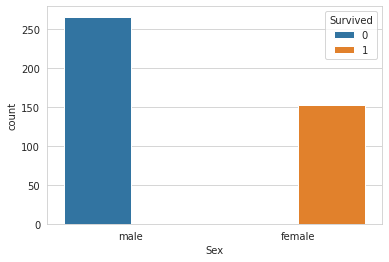

In [14]:
sns.countplot(x='Sex', hue='Survived', data=train)

## **How many Passengers class wised survived?**

In [15]:
# How many Passengers class wised survived
class_survived = train.groupby(['Pclass'])['Survived'].sum()
print(class_survived)

Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

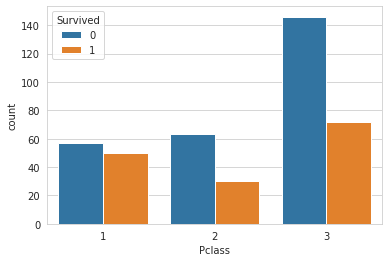

In [16]:
sns.countplot(x='Pclass', hue='Survived', data=train)

## **How many Females survived passenger class wise?**

In [18]:
# How many Females survived passenger class wise
female_class_survived = train.loc[train['Sex'] == 'female'].groupby(['Pclass'])['Survived'].sum()
print(female_class_survived)

Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

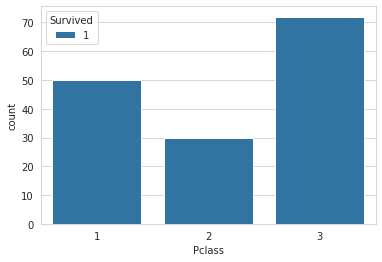

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=train[train['Sex'] == 'female'])

## **How many Females survived age wise?**

In [20]:
# How many Females survived age wise
female_age_survived = train.loc[train['Sex'] == 'female'].groupby(pd.cut(train['Age'], bins=[0, 18, 35, 50, 65, 100]))['Survived'].sum()
print(female_age_survived)

Age
(0, 18]      24
(18, 35]     62
(35, 50]     26
(50, 65]     14
(65, 100]     1
Name: Survived, dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

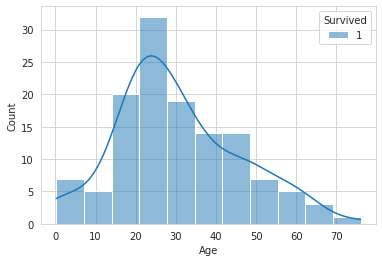

In [21]:
sns.histplot(x='Age', hue='Survived', data=train[train['Sex'] == 'female'], kde=True)

## **How many male survived ages wise?**

In [22]:
# How many male survived ages wise
male_age_survived = train.loc[train['Sex'] == 'male'].groupby(pd.cut(train['Age'], bins=[0, 18, 35, 50, 65, 100]))['Survived'].sum()
print(male_age_survived)

Age
(0, 18]      0
(18, 35]     0
(35, 50]     0
(50, 65]     0
(65, 100]    0
Name: Survived, dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

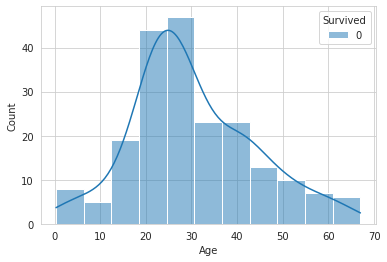

In [23]:
sns.histplot(x='Age', hue='Survived', data=train[train['Sex'] == 'male'], kde=True)

## **How many people survived class, age wise?**

In [25]:
# How many people survived class, age wise
class_age_survived = train.groupby([pd.cut(train['Age'], bins=[0, 18, 35, 50, 65, 100]), 'Pclass'])['Survived'].sum()
print(class_age_survived)

Age        Pclass
(0, 18]    1          2
           2          7
           3         15
(18, 35]   1         17
           2         18
           3         27
(35, 50]   1         15
           2          3
           3          8
(50, 65]   1         13
           2          1
           3          0
(65, 100]  1          1
           2          0
           3          0
Name: Survived, dtype: int64


<Axes: xlabel='Pclass', ylabel='Age'>

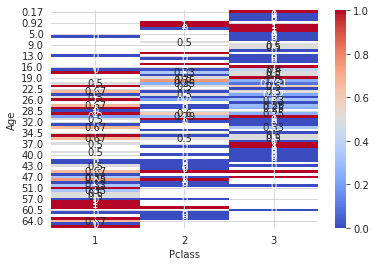

In [24]:
sns.heatmap(train.pivot_table(values='Survived', index='Age', columns='Pclass', aggfunc='mean'), cmap='coolwarm', annot=True)